<h1><center>Does high rank in NBA Draft really mean success?</center><h1>

<h3>Introduction<h3>

The National Basketball Association (NBA) is one of the most successful sports league in the world, raking in over $10 billion dollars a year. One of the most important events in the league is **Draft**, since it will bring new and young blood to the team. The draft works by having teams from the NBA pick players who are eligible and wish to join the league. These are typically college basketball players, but international players are also eligible to be drafted. The worst teams tend to have higher picks (lower Pk value). Teams and league will consider many factors when deciding who to pick such as the performance in college, physical body condition, mental index, etc.

Normally, people believe players picked earlier will usually have good performance in their career. Players like Lebron James, Kevin Durant, and Shaq O'Neal all went into the league with at high draft positions and have had huge success in their careers. However, there are also many players who were picked low but also had great success in their careers, namely Nikola Jokić who is the reigning two time MVP. Does a high pick in the draft always mean success? Just as how a high exam score cannot always determine the success of a student, we want to investigate if this phenomena applies to NBA draft positionse. In our final project, we want In our final project, we aim to explore whether draft pick (Pk) determines a player's performance in the NBA. Will a player selected with a high draft pick have a successful career in the NBA?

<h3>Dataset<h3>

We mainly used data from [Basketball Reference](https://www.basketball-reference.com/) website. We collected the draft data for each players from 2007 to 2020, and the performance for each players in seasons from 2007 to 2022.

<h3>Term explaination<h3>

There are some terms we used that is specifically for basketball, thus we think it is necessary to explain them. Below is the explaination:

* PTS: points that player earns
* WS: Win shares. Win Shares is a player statistic which attempts to divvy up credit for team success to the individuals on the team. Generally, win shares is the statistic which shows the contribution of a player to the win of the team. In other words, if a player can bring more victory to the team when he is on the field, his win shares will be high.
* WS/48 Win shares per 48 minutes. Since that the normal length for a NBA game is usually 48 minutes, this statistic is usually used to measure the performance for a player in one game.
* VORP: Value Over Replacement Player. The definition for it is: a box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season. In general, a high VORP means the player is unlike to be replaced by another play and he is very important to the team.

<h3>Analysis<h3>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from scipy.stats import ranksums

# import statsmodels.api as sm

We began our analysis by reading data from the CSV files and performing data cleaning. To clean the draft data, we removed all rows that were missing performance metrics such as Points per Game (PTS), Win Shares per 48 minutes (WS/48), and Value Over Replacement Player (VORP). For the season data, we removed duplicates of the same player who played for multiple teams in the same season by keeping only the first record.

In [3]:
file_list = []
df_lists = []
season_lists = []
df_season_lists = []

for i in range(7, 21):
    file_list.append("draft/"+str(i)+".csv")

for i in range(7, 22):
    season_lists.append("season/"+str(i)+".csv")


def draft_file_reader(file_list):
    for file in file_list:
        df = pd.read_csv(file)
        clean_data_draft(df)

# remove all the rows that have NaN values in the WS/48 or VORP or PTS columns

def clean_data_draft(df):
    df = df.dropna(subset=['WS/48', 'VORP', "PTS"])
    df_lists.append(df)

def season_file_reader(season_lists):
    for file in season_lists:
        df = pd.read_csv(file, encoding='latin1')
        clean_season_data(df)

def clean_season_data(df):
    # check if the player occurs in the df multiple times, take the first occurence
    df = df.drop_duplicates(subset=['Player'], keep='first')
    df_season_lists.append(df)

To begin our analysis, we created scatter plots of Value Over Replacement Player (VORP) vs. draft pick (Pk), Win Shares per 48 minutes (WS/48) vs. Pk, and Points per Game (PTS) vs. Pk. These scatter plots allow us to visualize the correlation between draft pick and various performance metrics. We also performed a linear regression on the data points in each plot to determine if there is a clear linear relationship between draft pick and performance metrics. If a strong linear relationship is present, it could suggest that draft pick significantly impacts a player's performance metrics, and vice versa.

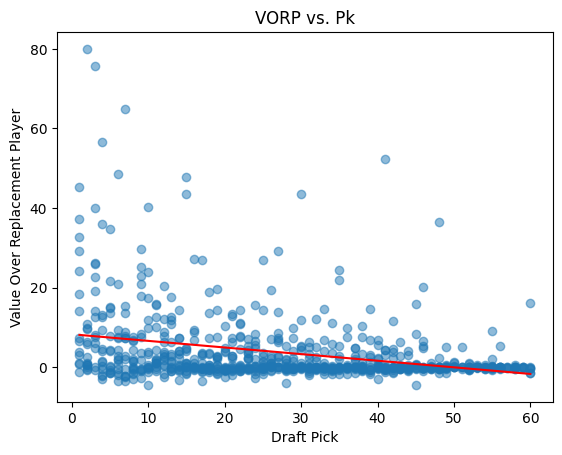

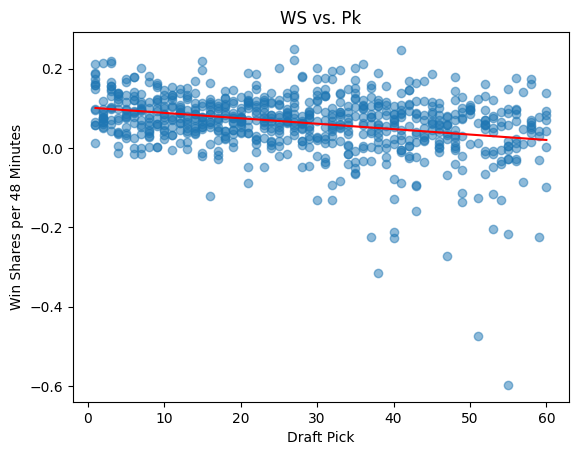

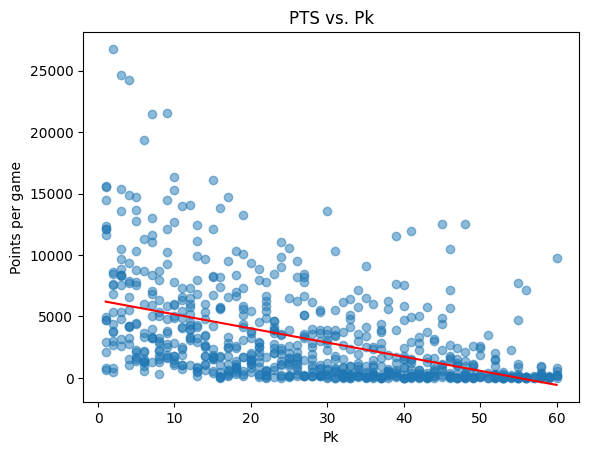

In [4]:
def draft_plot():
    plt.figure(1)
    # Concatenate all the dataframes into one
    df = pd.concat(df_lists, ignore_index=True)

    model_1 = LinearRegression()
    model_1.fit(df['Pk'].values.reshape(-1, 1), df['VORP'])
    y_pred_1 = model_1.predict(df['Pk'].values.reshape(-1, 1))
    plt.plot(df['Pk'], y_pred_1, color='red')

    # X = df['Pk'].values.reshape(-1, 1)
    # X = sm.add_constant(X)
    # Y = df['VORP']
    # model = sm.OLS(Y, X).fit()
    # print(model.summary())
    # plt.plot(X, model.predict(X), color='blue')
    
    plt.scatter(df['Pk'], df['VORP'], alpha=0.5)
    plt.xlabel("Draft Pick")
    plt.ylabel("Value Over Replacement Player")
    plt.title("VORP vs. Pk")
    # plt.savefig("VORP.png")
    plt.show()


    plt.figure(2)
    model_2 = LinearRegression()
    model_2.fit(df['Pk'].values.reshape(-1, 1), df['WS/48'])
    y_pred_2 = model_2.predict(df['Pk'].values.reshape(-1, 1))
    plt.plot(df['Pk'], y_pred_2, color='red')

    plt.scatter(df['Pk'], df['WS/48'], alpha=0.5)
    plt.xlabel("Draft Pick")
    plt.ylabel("Win Shares per 48 Minutes")
    plt.title("WS vs. Pk")
    # plt.savefig("WS48.png")
    plt.show()

    plt.figure(3)
    model_3 = LinearRegression()
    model_3.fit(df['Pk'].values.reshape(-1, 1), df['PTS'])
    y_pred_3 = model_3.predict(df['Pk'].values.reshape(-1, 1))
    plt.plot(df['Pk'], y_pred_3, color='red')

    plt.scatter(df['Pk'], df['PTS'], alpha=0.5)
    plt.xlabel("Pk")
    plt.ylabel("Points per game")
    plt.title("PTS vs. Pk")
    # plt.savefig("PTS.png")
    plt.show()

    return df

draft_file_reader(file_list)  
df = draft_plot()

    

Our scatter plots showed a general trend where lower draft picks lead to better performance in terms of VORP, WS, and PTS. However, there were many data points that did not follow this pattern and deviated from the fitted regression. While players with high draft picks tend to have better performance metrics, there were still many players with low draft picks who performed well. Conversely, there were players with high draft picks who had poor performance. Based on our analysis, we can conclude that draft pick is not the sole factor that determines how good an NBA player is.

In [5]:
# Group by pick number and calculate mean WS/48 and VORP
grouped = df.groupby('Pk').agg({'PTS.1': 'mean', 'PTS': 'mean','AST.1': 'mean', 'WS/48': 'mean', 'VORP': 'mean'}).reset_index()

# calculate the correlation matrix between draft pick and performance metrics
correlation_matrix = grouped[['Pk', 'PTS', 'WS/48', 'VORP']].corr()

# print the correlation matrix
print("Correlation matrix between draft pick and performance metrics\n", correlation_matrix)


Correlation matrix between draft pick and performance metrics
              Pk       PTS     WS/48      VORP
Pk     1.000000 -0.882619 -0.683460 -0.735113
PTS   -0.882619  1.000000  0.659910  0.917471
WS/48 -0.683460  0.659910  1.000000  0.618772
VORP  -0.735113  0.917471  0.618772  1.000000


To further explore the relationship between draft order and performance metrics, we calculated the correlation matrix between them. Our findings suggest that Points per Game (PTS) is the most strongly correlated with draft pick, followed by Value Over Replacement Player (VORP), and finally Win Shares per 48 minutes (WS/48). The correlation coefficient ranges from -1 to 1, where a value of 1/-1 indicates perfect correlation, and 0 means there is no correlation at all. The PTS metric appears to be the most influential factor on draft pick, with a correlation coefficient of -0.88. This indicates that lower PTS values are strongly associated with higher draft picks and vice versa. However, WS/48 does not have as strong of a relationship with draft pick, indicating that a player with a low draft pick is not guaranteed to have high WS/48 or contribute significantly to the game.

To gain more insight into the relationship between draft pick and performance metrics, we used t-tests to compare the means of two samples and determine if they are statistically different from each other. We divided the players into groups of five draft picks (e.g., Pk <= 5 vs Pk > 5 and Pk <= 10) and proposed the null hypothesis that there is no significant difference between the two groups in terms of average WS/48, VORP, and PTS. We set the significance level at 0.05. If the p-values of the t-tests are smaller than 0.05, we can reject the null hypothesis and conclude that there is a significant difference between the two groups.

In [6]:
# e.g. Null Hypothesis: There is no significant difference in the average WS/48 and VORP 
# between players selected in the top 5 picks (Pk <= 5) and players selected outside 
# the top 10 picks (Pk > 5 and Pk <= 10). If null hypothesis is greater than 0.05,
# then we can not reject the null hypothesis.
print("ttest between groups of 5 picks")
for i in range(0, 11):
# Split the data into two groups based on the Pk value
    top_picks = grouped[(grouped['Pk'] > i * 5) & (grouped['Pk'] <= (i + 1) * 5)]
    other_picks = grouped[(grouped['Pk'] > (i+1)*5) & (grouped['Pk'] <= (i+2)*5)]

    print("ttest group  1 Pk:", i*5, "-", (i+1)*5, "vs" , "group 2, pk: ", (i+1)*5, "-", (i+2)*5)

    # Perform a two-sample t-test on the WS/48 values
    ws_ttest = ttest_ind(top_picks['WS/48'], other_picks['WS/48'])

    # Print the p-value
    print('WS/48 p-value:', ws_ttest.pvalue)

    # Perform a two-sample t-test on the VORP values
    vorp_ttest = ttest_ind(top_picks['VORP'], other_picks['VORP'])

    # Print the p-value
    print('VORP p-value:', vorp_ttest.pvalue)

    # Perform a two-sample t-test on the PTS values
    pts_ttest = ttest_ind(top_picks['PTS'], other_picks['PTS'])

    # Print the p-value
    print('PTS p-value:', pts_ttest.pvalue)

ttest between groups of 5 picks
ttest group  1 Pk: 0 - 5 vs group 2, pk:  5 - 10
WS/48 p-value: 0.1339863009499683
VORP p-value: 0.06725490627035631
PTS p-value: 0.08142460446570043
ttest group  1 Pk: 5 - 10 vs group 2, pk:  10 - 15
WS/48 p-value: 0.6649048335800918
VORP p-value: 0.2438237328843759
PTS p-value: 0.1507986791562946
ttest group  1 Pk: 10 - 15 vs group 2, pk:  15 - 20
WS/48 p-value: 0.03927202522284016
VORP p-value: 0.04548843453913376
PTS p-value: 0.04762621155086901
ttest group  1 Pk: 15 - 20 vs group 2, pk:  20 - 25
WS/48 p-value: 0.6029268694686447
VORP p-value: 0.6589316932132546
PTS p-value: 0.15693166427702046
ttest group  1 Pk: 20 - 25 vs group 2, pk:  25 - 30
WS/48 p-value: 0.8111087957844176
VORP p-value: 0.9477707902527714
PTS p-value: 0.4351050383168582
ttest group  1 Pk: 25 - 30 vs group 2, pk:  30 - 35
WS/48 p-value: 0.23263609160222212
VORP p-value: 0.33206187829203065
PTS p-value: 0.13356138117740074
ttest group  1 Pk: 30 - 35 vs group 2, pk:  35 - 40
WS/48

The results of the p-values are shown above. It is not hard to perceive that most of the p-values are greater than 0.05, which means there is no significant difference between two groups. For example, there is no huge difference between the performances of players with pk 0-5 and pk 5-10. This better shows that draft pick numbers cannot indicate how well an NBA player performs in a game.

We then tried to determine if a player's adaptability from college to the league has a more direct influence on their later success. To do this, we collected NBA season data from 2007 to 2022 and used a scatter plot to visualize the relationship between a player's rookie year total points and their career Win Share per 48 minutes. Using a scatter plot to visualize the relationship between a player's rookie year total points and their career Win Share per 48 minutes, we found that players who score high total points in their rookie year are more likely to have high career Win Share scores. However, for players who start with low rookie year total points, predicting their career performance is challenging. Some players may have very high Win Share scores, while others may have very low scores.

In [7]:
def form_player_growth():
    # read the draft dataset
    draft_df = pd.concat(df_lists, ignore_index=True)

    # read the performance dataset
    performance_df = pd.concat(df_season_lists, ignore_index=True)

    # merge the datasets based on player names
    merged_df = pd.merge(draft_df, performance_df, on='Player', how='inner')
    print(merged_df)
    player_dict = {}
    for index, row in merged_df.iterrows():
        player_name = row['Player']
        pts_y = row['PTS_y']
        if player_name in player_dict:
            player_dict[player_name].append(pts_y)
        else:
            player_dict[player_name] = [pts_y]
        # Create a dictionary of player's first year points
    return player_dict

We also analyzed if a player's determination to improve themselves each season is a more direct indicator of their career success. We hypothesized that players who have the ability and opportunity to improve themselves in the off-season may have more potential to become a superstar in the NBA, like Stephen Curry, who went from scoring 1399 total points in his rookie year to 2375 at his prime in the 2015-2016 season. However, our scatter plot between the average total points growth per season in a player's first three seasons and career Win Share did not yield any conclusive results.

      Rk_x  Pk Tm_x             Player                College  Yrs    G_x  \
0        1   1  POR          Greg Oden             Ohio State  3.0  105.0   
1        1   1  POR          Greg Oden             Ohio State  3.0  105.0   
2        1   1  POR          Greg Oden             Ohio State  3.0  105.0   
3        1   1  POR          Greg Oden             Ohio State  3.0  105.0   
4        1   1  POR          Greg Oden             Ohio State  3.0  105.0   
...    ...  ..  ...                ...                    ...  ...    ...   
5793    52  52  SAC  Kenyon Martin Jr.                    NaN  3.0  196.0   
5794    59  59  TOR       Jalen Harris                 Nevada  1.0   13.0   
5795    59  59  TOR       Jalen Harris                 Nevada  1.0   13.0   
5796    60  60  NOP        Sam Merrill  Utah State University  3.0   38.0   
5797    60  60  NOP        Sam Merrill  Utah State University  3.0   38.0   

        MP_x   PTS_x  TRB_x  ...  FT%_y  ORB  DRB  TRB_y  AST_y  STL  BLK  

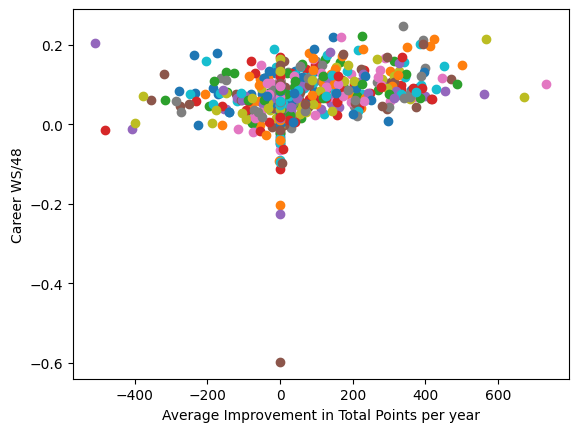

In [8]:
def average_year_analysis(player_dict):
    draft_df = pd.concat(df_lists, ignore_index=True)
        # Calculate the average improvement of total points each year for each player
    average_improvement_dict = {}
    for player_name, total_points_list in player_dict.items():
        if len(total_points_list) > 2:
            improvement_list = []
            for i in range(2):
                improvement = total_points_list[i+1] - total_points_list[i]
                improvement_list.append(improvement)
            average_improvement = sum(improvement_list) / len(improvement_list)
            average_improvement_dict[player_name] = average_improvement

            # Loop over each player in the dictionary and create a scatter plot
    for player_name, rookie_year in average_improvement_dict.items():
        # Get the WS/48 value for the player
        ws = draft_df.loc[draft_df['Player'] == player_name, 'WS/48'].values[0]

        # Create a scatter plot of rookie year vs WS/48
        plt.scatter(rookie_year, ws, label=player_name)

    # Set the x and y axis labels
    plt.xlabel('Average Improvement in Total Points per year')
    plt.ylabel('Career WS/48')
    plt.show()

draft_file_reader(file_list)  
season_file_reader(season_lists)
player_dict = form_player_growth()
average_year_analysis(player_dict)

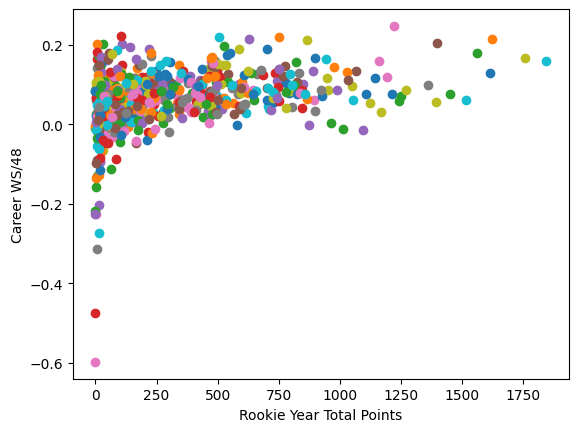

In [9]:
def rookie_year_analysis(player_dict):
    draft_df = pd.concat(df_lists, ignore_index=True)

    rookie_year_dict = {}
    for player_name, points_list in player_dict.items():
        rookie_year_dict[player_name] = points_list[0]
    
         # Loop over each player in the dictionary and create a scatter plot
    for player_name, rookie_year in rookie_year_dict.items():
        # Get the WS/48 value for the player
        ws = draft_df.loc[draft_df['Player'] == player_name, 'WS/48'].values[0]

        # Create a scatter plot of rookie year vs WS/48
        plt.scatter(rookie_year, ws, label=player_name)

    # Set the x and y axis labels
    plt.xlabel('Rookie Year Total Points')
    plt.ylabel('Career WS/48')
    plt.show()

rookie_year_analysis(player_dict)

First round draft selections get paid different amounts based on a Rookie Contract Scale that is determined by the CBA (National Basketball Players Association). For example in 2022-23 the #1 overall pick, Paolo Banchero was guaranteed about $30 million dollars while the #30 overall pick received a fifth of that: $6 million. This means if you are a team that drafts a superstar with a lower draft pick (higher number), you are gaining more production from a player for less money. We wanted to investigate if certain draft pick spots were more economical than others in this regard. 

In [10]:
def makeDraftDF():
    file_list = []
    for i in range(7,21):
        file_list.append("draft/"+str(i)+".csv")

    df_list = []

    for file in file_list:
        df_list.append(pd.read_csv(file).dropna(subset=['WS/48', 'VORP']))

    return pd.concat(df_list, ignore_index=True)

draft = makeDraftDF()
draft = draft[draft["Pk"] <= 30] #filter out second round picks
draft["lottery"] = draft.apply(lambda x: x["Pk"] <= 14, axis=1) #"lottery" picks are defined as the top 14 picks 
contractScale = pd.read_csv("rookieContractScale.csv") #contract scale from https://basketball.realgm.com/nba/info/rookie_scale
contractScale["total"] = contractScale.apply(lambda x: x["year1"]+x["year2"]+x["year3"],axis=1) #summmation of the guaranteed money
# firstpickValue = contractScale["total"].max()
# contractScale["scale"] = contractScale.apply(lambda x: x["total"]/firstpickValue,axis=1)
contractScale["millions"] = contractScale.apply(lambda x: x["total"]/1000000,axis=1)
# scale = contractScale["scale"].values.tolist()
money = contractScale["millions"].values.tolist()

Using the rookie contract scale, we adjusted Winshares (WS) and Value Over Replacement (VORP) using the amount of money they were paid in their rookie contract. Upon a quick look, it seemed like picks at the end of the first round were the most economic, with Miami Heat superstar Jimmy Butler making a great case for being one of the greatest draft selections of all time at #30.

In [11]:
# draft["adjusted_WS"] = draft.apply(lambda x: x["WS"]/scale[x["Pk"]-1],axis=1)
# draft["adjusted_VORP"] = draft.apply(lambda x: x["VORP"]/scale[x["Pk"]-1],axis=1)
draft["WS_per_million"] = draft.apply(lambda x: x["WS"]/money[x["Pk"]-1],axis=1)
draft["VORP_per_million"] = draft.apply(lambda x: x["VORP"]/money[x["Pk"]-1],axis=1)

VORPandWS = draft[["Pk", "Player", "WS", "VORP", "WS_per_million", "VORP_per_million"]]
sortByWS = VORPandWS.sort_values(by="WS_per_million", ascending=False)
sortByVORP = VORPandWS.sort_values(by="VORP_per_million", ascending=False)

print(sortByWS.head(10))
print()
print(sortByVORP.head(10))

     Pk                 Player     WS  VORP  WS_per_million  VORP_per_million
229  30           Jimmy Butler  104.4  43.5       18.373489          7.655620
336  27            Rudy Gobert   93.5  29.1       16.117077          5.016117
73   26            George Hill   70.7  19.3       11.836004          3.231045
71   24            Serge Ibaka   73.0  15.7       11.342096          2.439328
72   25          Nicolas Batum   66.4  26.9       10.747467          4.354019
124  26             Taj Gibson   59.7   7.1        9.994475          1.188623
324  15  Giannis Antetokounmpo   95.2  47.9        9.876031          4.969137
385  25           Clint Capela   58.9  14.3        9.533521          2.314590
214  15          Kawhi Leonard   89.3  43.4        9.263966          4.502308
105   7          Stephen Curry  126.7  65.0        8.135981          4.173944

     Pk                 Player     WS  VORP  WS_per_million  VORP_per_million
229  30           Jimmy Butler  104.4  43.5       18.373489    

To check that this trend was indeed true, adjusted_WS and adjusted_VORP were plotted and used to fit a linear regression. Unfortunately, it seems like the majority of draft picks are busts so many of the draft picks had adjusted WS/VORP near zero, which meant that there was little correlation to be found.

WS r_squared value: 0.01414440639487613
VORP r_squared value: 4.0943889638933584e-05


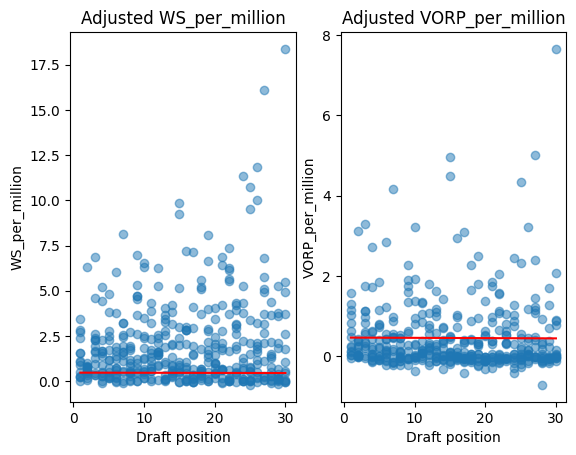

In [14]:
adjustedWS_model = LinearRegression()
adjustedWS_model.fit(draft['Pk'].values.reshape(-1, 1), draft["WS_per_million"])
predicted_WS_per_million = adjustedWS_model.predict(draft['Pk'].values.reshape(-1, 1))
    
r_squared = r2_score(draft["WS_per_million"], predicted_WS_per_million)
print("WS r_squared value:",r_squared)

adjustedVORP_model = LinearRegression()
adjustedVORP_model.fit(draft['Pk'].values.reshape(-1, 1), draft["VORP_per_million"])
predicted_VORP_per_million = adjustedVORP_model.predict(draft['Pk'].values.reshape(-1, 1))
    
r_squared = r2_score(draft["VORP_per_million"], predicted_VORP_per_million)
print("VORP r_squared value:",r_squared)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(draft['Pk'], predicted_VORP_per_million, color='red')
plt.scatter(draft["Pk"], draft["WS_per_million"], alpha=0.5)
plt.title("Adjusted WS_per_million")
plt.xlabel('Draft position')
plt.ylabel('WS_per_million')

plt.subplot(1, 2, 2) # index 2
plt.plot(draft['Pk'], predicted_VORP_per_million, color='red')
plt.scatter(draft["Pk"], draft["VORP_per_million"], alpha=0.5)
plt.title("Adjusted VORP_per_million")
plt.xlabel('Draft position')
plt.ylabel('VORP_per_million')

plt.show()

Our question then pivoted to: what draft pick are you most likely to get a quality player at? We used the Basketball Reference's box plus minus statistic (BPM), which they attributed a BPM of +0.0 or higher to be a "decent starter" (https://www.basketball-reference.com/about/bpm2.html#:~:text=%2B8.0%20is%20an%20MVP%20season,2.0%20is%20a%20good%20starter). Here, we were able to use a rank sum test to conclude that draft position does impact whether or not a player will be a quality player since the pvalue of the rank sum test was 4.34e-12. This result can be interpreted to mean that the NBA scouts do a decent job at evaluating who will be a good player to choose.  

RanksumsResult(statistic=-6.925382231286605, pvalue=4.347999203556411e-12)
r_squared value: 0.15386520944511006


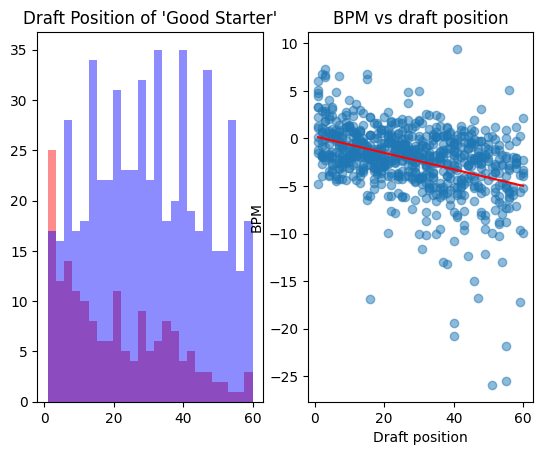

In [15]:
draft2 = makeDraftDF()
draft2["GoodStarter"] = draft2.apply(lambda x: x["BPM"] > 0, axis=1)


#rank sum result

starter = draft2[draft2["GoodStarter"] == True]["Pk"]
notstarter = draft2[draft2["GoodStarter"] == False]["Pk"]
ranksumResult = ranksums(starter,notstarter)
print(ranksumResult)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.title("Draft Position of 'Good Starter'")
plt.hist(starter, bins=25, alpha=0.45, color='red')
plt.hist(notstarter, bins=25, alpha=0.45, color='blue')


#linear regression of BPM vs pk
bpm_model = LinearRegression()
bpm_model.fit(draft2['Pk'].values.reshape(-1, 1), draft2["BPM"])
predictedBPM = bpm_model.predict(draft2['Pk'].values.reshape(-1, 1))

r_squared = r2_score(draft2["BPM"], predictedBPM)
print("r_squared value:",r_squared)

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.plot(draft2['Pk'], predictedBPM, color='red')
plt.scatter(draft2["Pk"], draft2["BPM"], alpha=0.5)
plt.title("BPM vs draft position")
plt.xlabel('Draft position')
plt.ylabel('BPM')
plt.show()

<h3>Conclusion<h3>

Overall, our findings indicate that there is a correlation between a player's draft pick position and their BPM. Higher drafted players tend to have better BPMs. However this should be taken with a grain of salt. Draft pick position does not determine a player's winshare or VORP so perhaps this means that the team that the player is drafted to is a much more important metric to consider. After all, basketball is a team game. Perhaps the true key to success are  factors that are hard to quantify. One such factor is the player's determination and hard work. Kobe Bryant, for instance, was drafted 13th overall, which would suggest that he was not expected to be highly successful. However, his unwavering determination and hard work enabled him to become one of the greatest players in NBA history. Additionally, a player's potential for injury is another aspect that can impact their success. For example, Greg Oden had a stellar college performance and impressive athletic abilities, but his leg length discrepancy made him prone to injury, ultimately leading to a failed career.

